<a href="https://colab.research.google.com/github/sofiacorreao/Analitica/blob/main/Reto_2_Sofia_Correa_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Gráficador de cosas
from sklearn.tree import DecisionTreeClassifier

1. Carga de datos del archivo

In [ ]:
nxl='/content/2. BD1_Travel_Data_int (1).xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna() #Elimina celdas vacias o sin datos
XDB.head(100)

#Se procede con la seleccion de las variables de trabajo
XD=np.array(XDB[['College1','FoodSpend','Income','TravelSpend']]) #Datos entrada
yd=np.array(XDB[['CreditCard1']]) #Este es el dato que quiero que el modelo pronostique
print (yd)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


2. Creación del modelo - Decision tree

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm [0,0]
FP=cm [0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos prónostico correctamente
print('La exactitud alcanzada por el modelo es:',Ex)
Se= VP/(FN+VP)
print('La sensibilidad alcanzada por el modelo fue:',Se)
Es=VN/(VN+FP)
print('La especificidad alcanzada por el modelo fue:',Es)

[[334   9]
 [ 42 115]]
La exactitud alcanzada por el modelo es: 0.898
La sensibilidad alcanzada por el modelo fue: 0.732484076433121
La especificidad alcanzada por el modelo fue: 0.9737609329446064


3. Arbol de decisión

In [ ]:
#Estas son las librerias para gráficar el arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['College1','FoodSpend','Income','TravelSpend'] #Son los titulos para los nodos
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

4. Prónostico de las personas con las siguientes carácteristicas: College, FoodSpend, Income, TravelSpend

In [ ]:
XDB2=pd.read_excel(nxl,sheet_name=1).iloc[:2, :4]
XDB2=XDB2.dropna() #Elimina celdas vacias o sin datos
XDB2.head(100)

XD2=np.array(XDB2[['College','FoodSpend','Income','TravelSpend']])
print(XD2)

#Pronosticamos la PreAprobacion
ydp2=mar.predict(XD2)
print(ydp2)
print('El numero de personas que van usar tarjeta de crédito es:',np.sum(ydp2))
print('El numero total de datos es:',len(ydp2))
print('El numero de personas que no van a usar tarjeta de crédito es:',len(ydp2)-np.sum(ydp2))


[[0.00000e+00 2.89290e+03 6.59820e+04 2.15160e+03]
 [1.00000e+00 6.01766e+03 5.39860e+04 2.00250e+03]]
[0 0]
El numero de personas que van usar tarjeta de crédito es: 0
El numero total de datos es: 2
El numero de personas que no van a usar tarjeta de crédito es: 2


**Análisis de resultados**

De acuerdo con la base de datos suministrada y el nodo base del árbol de decisión se puede observar un total de 500 datos, divididos en 343 personas que van a usar tarjeta de crédito para el pago de los gastos de viaje y de los alimentos y un total de 157 personas que no utilizarán tarjeta de crédito, esto representa el 68,6% y el 31,4% respectivamente.

De acuerdo con el pronóstico realizado por el modelo, este alcanzó una exactitud cercana al 90%, estos valores no fueron similares a la Sensibilidad que fue 73% que mide el comportamiento del modelo frente a la clasificación de las personas que utilizaran la tarjeta de crédito, así como frente a la Especificidad (97%), indicador que mide el comportamiento del modelo frente a la clasificacion de las personas que no usaran la tarjeta de crédito.

Se destacan 3 nodos Puros: "[0,47]","[1,0]","[108,0]", donde la probabilidad de ocurrencia de algún suceso es del 100%

Con respecto al pronóstico, se puede observar un total de 2 individuos, de los cuales un total de 0 van a usar tarjeta de crédito y un total de 2 que no la van a utilizar. En conclusión las 2 personas analizadas no usaran la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos.



**Preguntas Word**

•**⁠  ⁠En el documento de Análisis en la Plataforma Google Colab, llevar a cabo la descripción de cada una de las variables que conforman el modelo.**

Inicialmente las variables CreditCard y College estaban déscritas por 'Si' y 'No", es por esta razón que las convertí en variables categóricas con valores entre '0' o '1' siendo yes= 1 y no=0. Luego siguen las variables númericas donde se describn Income, FoodSpend y TravelSpend de cada persona.






•⁠ **⁠Determinar las métricas de exactitud general, sensibilidad, especificidad**

La exactitud alcanzada por el modelo es: 0.898

La sensibilidad alcanzada por el modelo fue: 0.732484076433121

La especificidad alcanzada por el modelo fue: 0.9737609329446064


•**⁠  ⁠De acuerdo con los nuevos clientes en la base de datos Travelan Score, Cuál es la probabilidad de que el primer cliente tenga planes de viajar el próximo año, y cuál es la probabilidad para el segundo cliente.**

La probababilidad del primer cliente es 100% que no tenga planes de viajar el próximo año y la del segundo cliente es 78,7%  que no tenga planes de viajar el próximo año y 21,3% que si tiene planes de viajar el próximo viaje






**⁠¿Indicar cuáles son las reglas que poseen nodos puros?** **texto en negrita**

Se destacan 3 nodos puros: "[0,47]","[1,0]","[108,0]"


**•⁠  ⁠Determinar las reglas para los nuevos clientes. **

Si el resultado es "0", significa que la tarjeta no será utilizada, mientras que un valor de "1" indica que sí lo será. En el caso de los dos individuos con las características específicas analizadas, ambos obtuvieron un valor de "0", lo que sugiere que ninguno de ellos hará uso de la tarjeta.

**⁠  ⁠Indicar las reglas del negocio a las que pertenecen los dos individuos anteriores.**

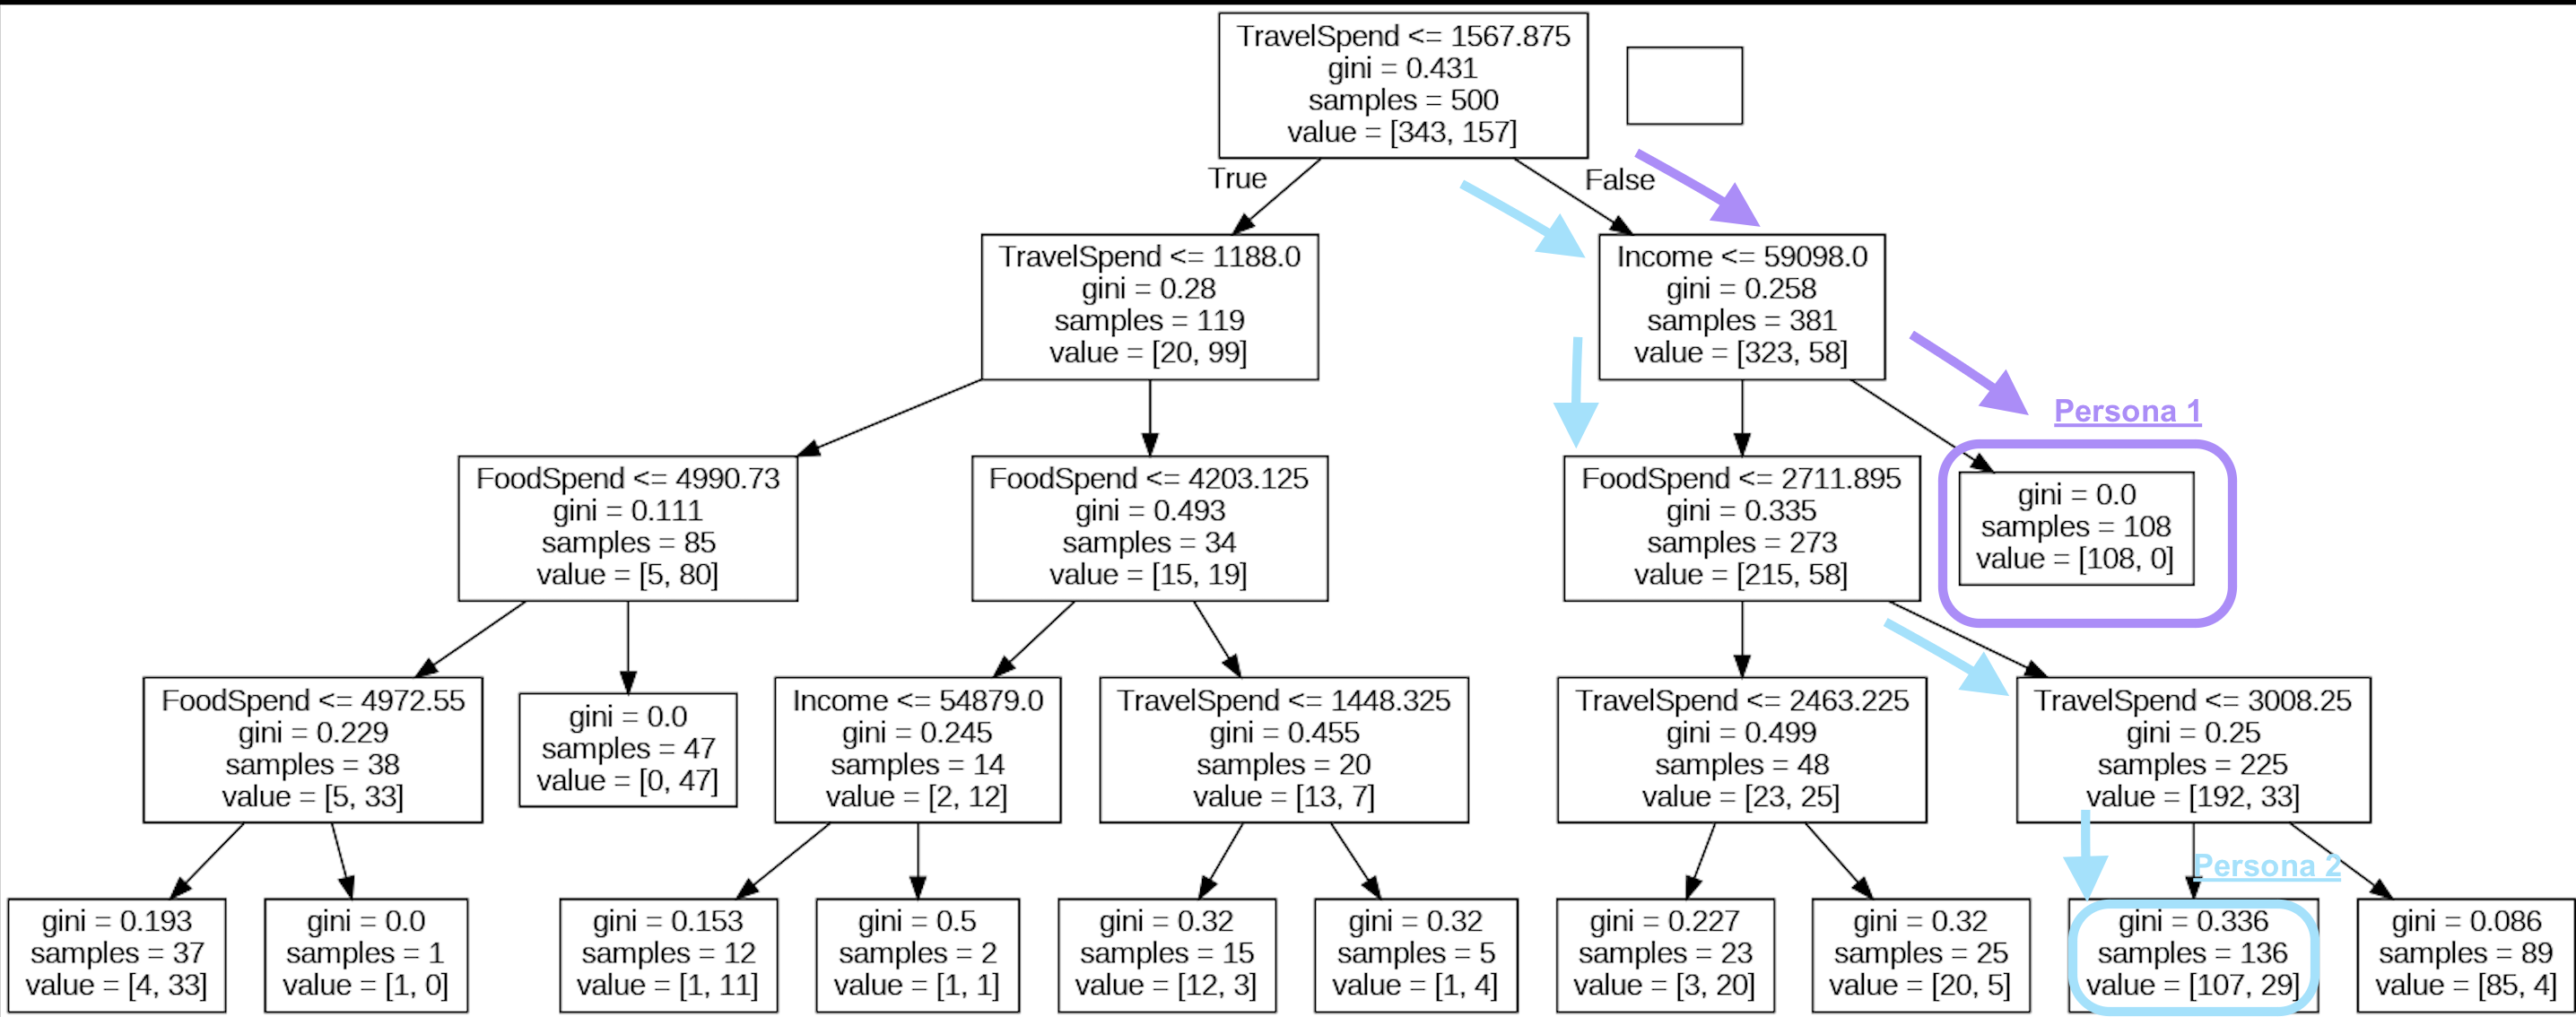




*Para el cliente 1:* TravelSpend <= 1567.875, false, rama derecha Income <= 59098.0, false, rama derecha

*Para el cliente 2:* TravelSpend <= 1567.875, false, rama derecha Income <= 59098.0, True, rama izquierda FoodSpend <= 2711.895, false, rama derecha TravelSpend <= 3008.25, true, rama izquierda
